In [364]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#for test train split
from sklearn.model_selection import train_test_split
#for feture scaling
from sklearn.preprocessing import MinMaxScaler
#statmodel linear regression
import statsmodels.api as sm
#for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [365]:
#Load and inspecting the data
car = pd.read_csv('CarPrice_Assignment.csv')
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [366]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [367]:
car.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [368]:
#checking for null values
round(car.isnull().sum()/len(car.index), 2)*100

car_ID              0.0
symboling           0.0
CarName             0.0
fueltype            0.0
aspiration          0.0
doornumber          0.0
carbody             0.0
drivewheel          0.0
enginelocation      0.0
wheelbase           0.0
carlength           0.0
carwidth            0.0
carheight           0.0
curbweight          0.0
enginetype          0.0
cylindernumber      0.0
enginesize          0.0
fuelsystem          0.0
boreratio           0.0
stroke              0.0
compressionratio    0.0
horsepower          0.0
peakrpm             0.0
citympg             0.0
highwaympg          0.0
price               0.0
dtype: float64

In [369]:
# Dropping Duplicates if any
car =car.drop_duplicates()

In [370]:
#we can drop the car_ID variable which is not relevent for the price modeling
car.drop('car_ID',axis=1,inplace=True)

## Visualising the Data


 If there is some multicollinearity going on, then we will check and delete data.
 We can identify some predictors directly have a strong association with the outcome variable

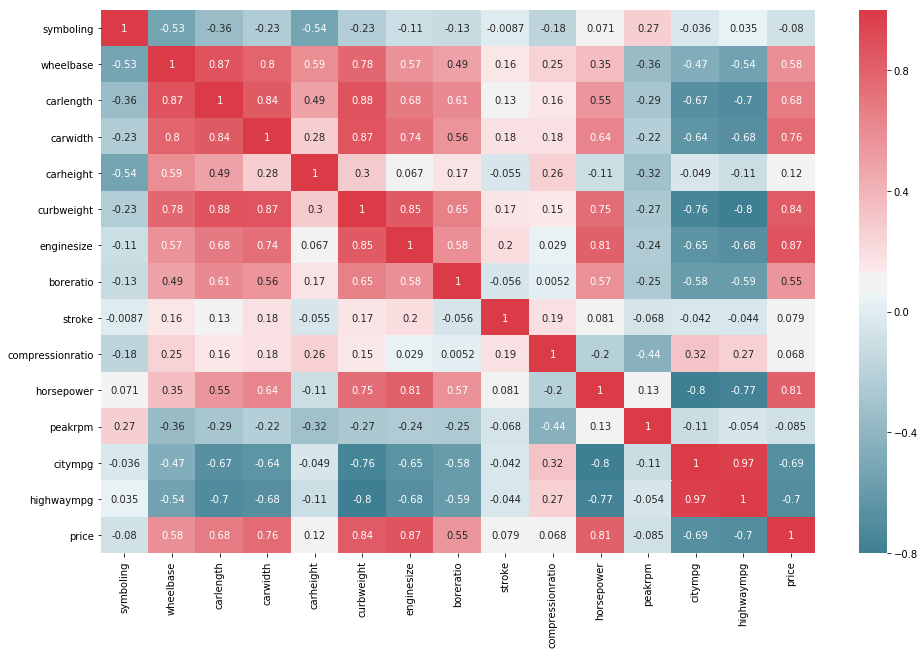

In [371]:
plt.figure(figsize = (16, 10))
corr = car.corr()
sns.heatmap(corr, annot = True, cmap= sns.diverging_palette(220, 10, as_cmap=True))
plt.show()

From this, We can say that some features are related to each other which are positive & negative correlated.
-  wheelbase,
-  carlength,
-  carwidth,
-  curbweight,
-  enginesize,
-  boreratio,
-  horsepower.
-  citympg,
-  highwaympg.
<br>
We will further explore these. For now we know there is some relationship going on with the price variable.


The categorical variable **CarName** is comprised of two parts - the first word is the name of 'car company' and the second is the 'car model'. We need to consider only company name as the independent variable for model building. 

In [372]:
# separating the brand name of the car from the CarName variable


car["company"]=car["CarName"].str.split(" ").str[0]
car.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [373]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg      

In [374]:
# changing some variables to categorical variables according to data dictionary.
for col in['symboling','fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem']:
    car[col]=car[col].astype('category')

car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling           205 non-null category
CarName             205 non-null object
fueltype            205 non-null category
aspiration          205 non-null category
doornumber          205 non-null category
carbody             205 non-null category
drivewheel          205 non-null category
enginelocation      205 non-null category
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null category
cylindernumber      205 non-null category
enginesize          205 non-null int64
fuelsystem          205 non-null category
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-nul

In [375]:
car=car.drop(['CarName'],axis=1)
car.shape

(205, 25)

In [376]:
varlist =  ['company']

# Defining the map function
def car_company(x):
    return x.map({'audi':'audi','bmw':'bmw','chevrolet':'chevrolet','dodge':'dodge','honda':'honda','isuzu':'isuzu',
                  'Nissan': 'nissan', 'nissan':'nissan', 'porsche':'porsche','porcshce': 'porsche','toyouta':'toyota',
                  'jaguar':'jaguar','renault':'renault','saab':'saab','subaru':'subaru','toyota':'toyota',
                  'buick':'buick','peugeot':'peugeot','plymouth':'plymouth','volvo':'volvo','mazda':'mazda',
                  'mercury':'mercury','mitsubishi':'mitsubishi','volkswagen':'volkswagen',
                  'vokswagen':'volkswagen','vw':'volkswagen','maxda':'mazda','alfa-romero':'alfa-romeo'})

# Applying the function to the housing list
car[varlist] = car[varlist].apply(car_company)

In [377]:
print(car.shape)
car['company'].nunique()

(205, 25)


22

In [378]:
for col in['symboling','fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem','company']:
    car[col]=car[col].astype('category')

car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 25 columns):
symboling           205 non-null category
fueltype            205 non-null category
aspiration          205 non-null category
doornumber          205 non-null category
carbody             205 non-null category
drivewheel          205 non-null category
enginelocation      205 non-null category
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null category
cylindernumber      205 non-null category
enginesize          205 non-null int64
fuelsystem          205 non-null category
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg             205 non-null

In [379]:
categorical = list(car.columns[car.dtypes == 'category'])
categorical

['symboling',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem',
 'company']

Let's see how the prices vary with the different automobile companies in the US market

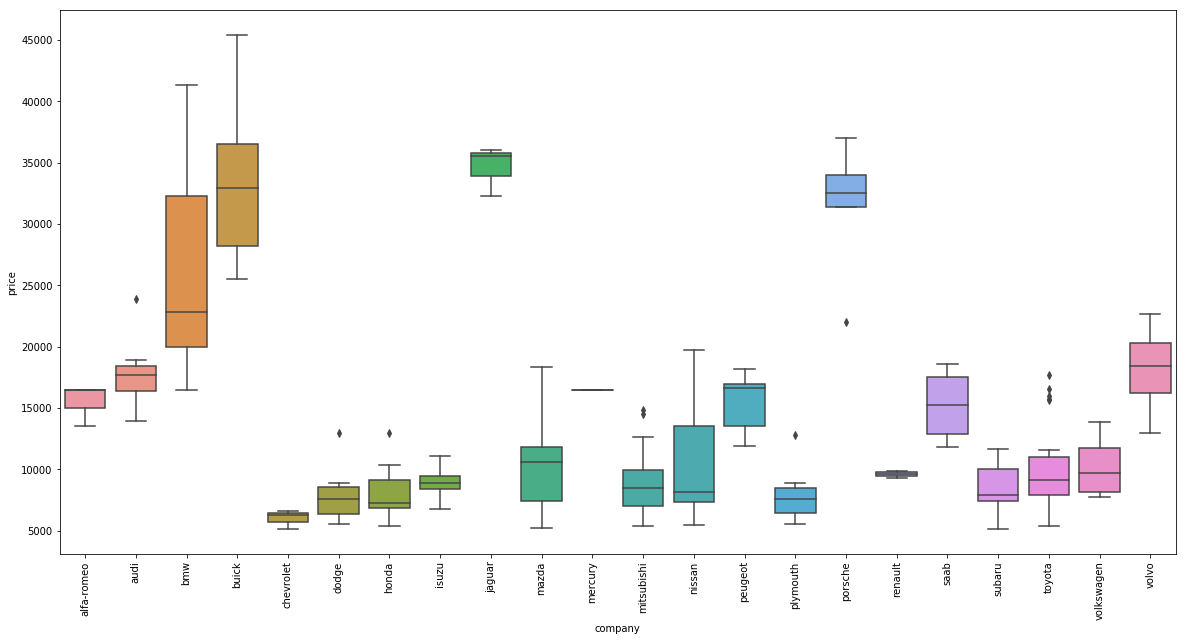

Average US car price:  13276.710570731706
company
jaguar     34600.000000
buick      33647.000000
porsche    31400.500000
bmw        26118.750000
volvo      18063.181818
Name: price, dtype: float64


In [380]:
plt.figure(figsize=(20,10))
sns.boxplot(x = categorical[-1], y = 'price', data = car)
plt.xticks(rotation=90)
plt.show()
print('Average US car price: ',car['price'].mean())
print(car.groupby('company').price.mean().sort_values(ascending=False).head())

We can also see how multiple categorical variables together affect the pricing of cars.

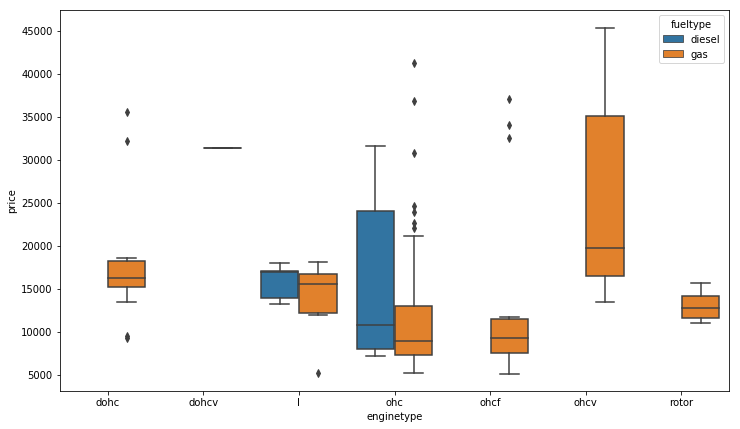

In [381]:
plt.figure(figsize=(12,7))
sns.boxplot(x='enginetype', y='price', hue = 'fueltype', data=car)
plt.show()

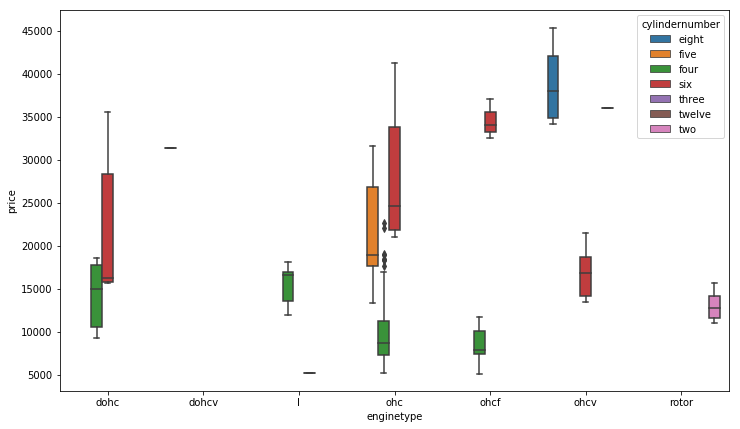

In [382]:
plt.figure(figsize=(12,7))
sns.boxplot(x='enginetype', y='price', hue = 'cylindernumber', data=car)
plt.show()

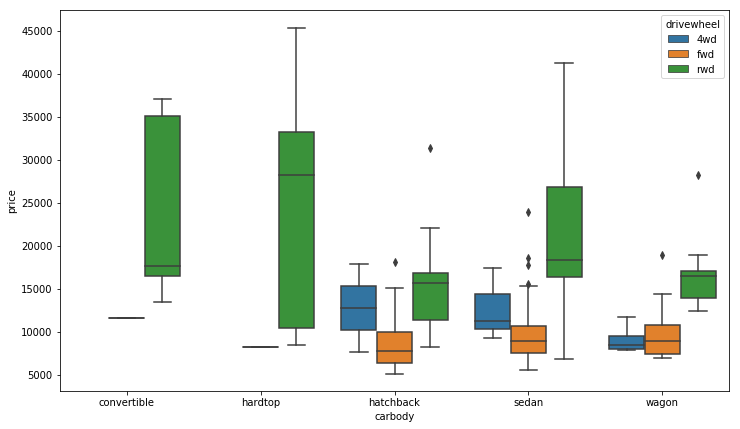

In [383]:
plt.figure(figsize=(12,7))
sns.boxplot(x='carbody', y='price', hue = 'drivewheel', data=car)
plt.show()

**Observation:**
-  Each company has a range in which the cars are priced. There are few outilers for these companies showing that they do manufacture some expensive cars which are priced above their usual market pricing range.
-  Cars manufacturers like jaguar, Buick, Porsche, BMW, Volo are clearly on the high end side, priced well above the average US cars price which is approx. $13,000.
-  company name shows some affect on the price determination.

#### From above table we can notice there are outliers for a few variables

Let us see how we can logically explain them.

In [384]:
np.percentile(car['compressionratio'],(70,75,85,90,95))

array([ 9.4 ,  9.4 ,  9.5 , 10.94, 21.82])

#### compressionratio 
we can see that there is a sudden increase of values from 90th %tile. However diesel engines from bigger brands have compression ratio above 20. As in the data all the values are from diesel engines so not handling them.

#### horsepower
 the value 288 (100th %tile) is because the porsche car has 8 cylinders for that observation. So, not considering it as an outlier.

## Conclusion on outliers
As per the business understanding, the high values in some variables are due to high number of cylinders, engine  size etc. Bigger brand's premium cars may have such values. So continuing without handling the outliers

In [385]:
car['enginetype'].unique()

[dohc, ohcv, ohc, l, rotor, ohcf, dohcv]
Categories (7, object): [dohc, ohcv, ohc, l, rotor, ohcf, dohcv]

In [386]:
car['enginetype']=car['enginetype'].map({'dohc':'dohc', 'ohcv':'ohcv', 'ohc':'ohc', 'l':'l', 'rotor':'rotor','dohcv': 'dohc','ohcf':'ohcv'})
car['enginetype'].nunique()

5

### DUMMY variable creation

#### creating dummy variables for variables with 2 levels

In [387]:
car['enginelocation'].unique()

[front, rear]
Categories (2, object): [front, rear]

In [388]:
# List of variables to map

varlist =  ['fueltype','aspiration','doornumber','enginelocation']

# Defining the map function
def binary_map(x):
    return x.map({'diesel':1, 'gas':0,'std':1, 'turbo':0,'four':1,'two':0,'front':1,'rear':0})

# Applying the function to the housing list
car[varlist] = car[varlist].apply(binary_map)

In [389]:
status = pd.get_dummies(car[['symboling','company','carbody','drivewheel','enginetype','cylindernumber','fuelsystem']],drop_first = True)

In [390]:
status.shape

(205, 49)

In [391]:
car = pd.concat([car, status], axis = 1)
car.head()
print(car.shape)

(205, 74)


In [392]:
car.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', 'company', 'symboling_-1',
       'symboling_0', 'symboling_1', 'symboling_2', 'symboling_3',
       'company_audi', 'company_bmw', 'company_buick', 'company_chevrolet',
       'company_dodge', 'company_honda', 'company_isuzu', 'company_jaguar',
       'company_mazda', 'company_mercury', 'company_mitsubishi',
       'company_nissan', 'company_peugeot', 'company_plymouth',
       'company_porsche', 'company_renault', 'company_saab', 'company_subaru',
       'company_toyota', 'company_volkswagen', 'company_volvo',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd', 

In [393]:
### dropping the columns which are not required
car.drop(['company','carbody','drivewheel','enginetype','cylindernumber','fuelsystem','fueltype','aspiration','doornumber','enginelocation'], axis = 1, inplace = True)

In [394]:
car.shape

(205, 64)

### Splitting the Data into Training and Testing Sets

In [395]:
np.random.seed(0)
df_train, df_test = train_test_split(car, train_size = 0.7, test_size = 0.3, random_state = 100)

#### Rescaling the Features

In [396]:
scaler = MinMaxScaler()

In [397]:
#Applying scalar to remaining elements
scaling  = ['symboling','wheelbase','carlength','carwidth','carheight','curbweight','enginesize', 'boreratio', 'stroke', 'compressionratio','horsepower', 'peakrpm', 'citympg','highwaympg','price']

df_train[scaling] = scaler.fit_transform(df_train[scaling])

In [398]:
df_train.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
122,0.6,0.244828,0.426016,0.291667,0.265487,0.272692,0.139623,0.230159,0.525253,0.15000,...,0,0,0,1,0,0,0,0,0,0
125,1.0,0.272414,0.452033,0.666667,0.212389,0.500388,0.339623,1.000000,0.464646,0.15625,...,0,0,0,0,0,0,0,1,0,0
166,0.6,0.272414,0.448780,0.308333,0.424779,0.314973,0.139623,0.444444,0.449495,0.15000,...,0,0,0,0,0,0,0,1,0,0
1,1.0,0.068966,0.450407,0.316667,0.088496,0.411171,0.260377,0.626984,0.247475,0.12500,...,0,0,0,0,0,0,0,1,0,0
199,0.2,0.610345,0.775610,0.575000,0.858407,0.647401,0.260377,0.746032,0.484848,0.03125,...,0,0,0,0,0,0,0,1,0,0


### Dividing into X and Y sets for the model building

In [399]:
y_train = df_train.pop('price')
X_train = df_train

## Building a linear model
we will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

In [400]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 10)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [401]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 32),
 ('wheelbase', False, 29),
 ('carlength', False, 24),
 ('carwidth', True, 1),
 ('carheight', False, 23),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', False, 38),
 ('horsepower', False, 7),
 ('peakrpm', False, 16),
 ('citympg', False, 46),
 ('highwaympg', False, 31),
 ('symboling_-1', False, 28),
 ('symboling_0', False, 30),
 ('symboling_1', False, 33),
 ('symboling_2', False, 37),
 ('symboling_3', False, 36),
 ('company_audi', False, 12),
 ('company_bmw', True, 1),
 ('company_buick', False, 10),
 ('company_chevrolet', False, 50),
 ('company_dodge', False, 42),
 ('company_honda', False, 43),
 ('company_isuzu', False, 15),
 ('company_jaguar', False, 9),
 ('company_mazda', False, 20),
 ('company_mercury', False, 51),
 ('company_mitsubishi', False, 39),
 ('company_nissan', False, 21),
 ('company_peugeot', False, 5),
 ('company_plymouth', False, 40),
 ('company_porsche', True, 1),
 ('compa

In [402]:
##columns which are shortlisted by RFE
col = X_train.columns[rfe.support_]
col

Index(['carwidth', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'company_bmw', 'company_porsche', 'cylindernumber_three',
       'cylindernumber_twelve', 'cylindernumber_two'],
      dtype='object')

In [403]:
##columns which are not included
X_train.columns[~rfe.support_]

Index(['symboling', 'wheelbase', 'carlength', 'carheight', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'symboling_-1',
       'symboling_0', 'symboling_1', 'symboling_2', 'symboling_3',
       'company_audi', 'company_buick', 'company_chevrolet', 'company_dodge',
       'company_honda', 'company_isuzu', 'company_jaguar', 'company_mazda',
       'company_mercury', 'company_mitsubishi', 'company_nissan',
       'company_peugeot', 'company_plymouth', 'company_renault',
       'company_saab', 'company_subaru', 'company_toyota',
       'company_volkswagen', 'company_volvo', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuel

### Building model using statsmodel, for the detailed statistics

In [404]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [405]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [406]:
lm1 = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [407]:
# summary of our initial model
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     129.4
Date:                Sun, 03 Feb 2019   Prob (F-statistic):           3.83e-63
Time:                        23:39:15   Log-Likelihood:                 187.10
No. Observations:                 143   AIC:                            -352.2
Df Residuals:                     132   BIC:                            -319.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.08

In [408]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,26.72
2,curbweight,9.34
3,enginesize,7.96
1,carwidth,4.63
4,boreratio,2.20
9,cylindernumber_twelve,1.74
5,stroke,1.50
7,company_porsche,1.28
10,cylindernumber_two,1.27
6,company_bmw,1.16


`cylindernumber_twelve` is insignificant in presence of other variables; can be dropped

In [409]:
X_train_rfe2 = X_train_rfe.drop(["cylindernumber_twelve"], axis = 1)

In [410]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm2 = sm.add_constant(X_train_rfe2)


# Running the linear model
lm2 = sm.OLS(y_train,X_train_lm2).fit()   

In [411]:
#Let's see the summary of our linear model
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     140.5
Date:                Sun, 03 Feb 2019   Prob (F-statistic):           1.96e-63
Time:                        23:39:16   Log-Likelihood:                 185.10
No. Observations:                 143   AIC:                            -350.2
Df Residuals:                     133   BIC:                            -320.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0990 

In [412]:
vif = pd.DataFrame()
X =X_train_lm2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,25.01
2,curbweight,8.58
3,enginesize,5.15
1,carwidth,4.62
4,boreratio,2.12
5,stroke,1.28
7,company_porsche,1.23
9,cylindernumber_two,1.17
6,company_bmw,1.10
8,cylindernumber_three,1.05


`curbweight` is insignificant in presence of other variables; can be dropped too

In [413]:
X_train_lm3 = X_train_lm2.drop(["curbweight"], axis = 1)

In [414]:
X_train_lm3 = sm.add_constant(X_train_lm3)

In [415]:
lm4 = sm.OLS(y_train,X_train_lm3).fit()   # Running the linear model

In [416]:
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     138.4
Date:                Sun, 03 Feb 2019   Prob (F-statistic):           6.68e-61
Time:                        23:39:17   Log-Likelihood:                 176.10
No. Observations:                 143   AIC:                            -334.2
Df Residuals:                     134   BIC:                            -307.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1190 

In [417]:
vif = pd.DataFrame()
X = X_train_lm3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,24.34
2,enginesize,3.05
1,carwidth,2.92
3,boreratio,1.97
4,stroke,1.28
8,cylindernumber_two,1.14
6,company_porsche,1.13
5,company_bmw,1.10
7,cylindernumber_three,1.05


`stroke` is also insignificant. Removing it and building the model again.

In [418]:
X_train_lm4 = X_train_lm3.drop(["stroke"], axis = 1)
X_train_lm4 = sm.add_constant(X_train_lm4)
lm5 = sm.OLS(y_train,X_train_lm4).fit()
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     154.4
Date:                Sun, 03 Feb 2019   Prob (F-statistic):           3.31e-61
Time:                        23:39:18   Log-Likelihood:                 174.10
No. Observations:                 143   AIC:                            -332.2
Df Residuals:                     135   BIC:                            -308.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1638 

In [419]:
vif = pd.DataFrame()
X = X_train_lm4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,10.08
2,enginesize,2.92
1,carwidth,2.82
3,boreratio,1.70
5,company_porsche,1.13
7,cylindernumber_two,1.13
4,company_bmw,1.09
6,cylindernumber_three,1.05


dropping `boreratio` and building the model again

In [420]:
X_train_lm5 = X_train_lm4.drop(["boreratio"], axis = 1)
X_train_lm5 = sm.add_constant(X_train_lm5)
lm5 = sm.OLS(y_train,X_train_lm5).fit()
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     177.3
Date:                Sun, 03 Feb 2019   Prob (F-statistic):           9.72e-62
Time:                        23:39:19   Log-Likelihood:                 172.61
No. Observations:                 143   AIC:                            -331.2
Df Residuals:                     136   BIC:                            -310.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1786 

In [421]:
vif = pd.DataFrame()
X = X_train_lm5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,8.07
2,enginesize,2.83
1,carwidth,2.60
6,cylindernumber_two,1.12
3,company_bmw,1.09
4,company_porsche,1.05
5,cylindernumber_three,1.05


# Residual Analysis of the train data

In [422]:
#prediction for the last model

y_train_price = lm5.predict(X_train_lm5)

Text(0.5,0,'Errors')

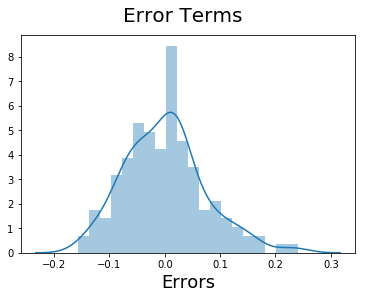

In [423]:
# Plotting the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

## Making Predictions

In [424]:
#Scaling the variables for test dataset

scaling  = ['symboling','wheelbase','carlength','carwidth','carheight','curbweight','enginesize', 'boreratio', 'stroke', 'compressionratio','horsepower', 'peakrpm', 'citympg','highwaympg','price']

df_test[scaling] = scaler.fit_transform(df_test[scaling])

In [425]:
# Dividing into X_test and y_test

y_test = df_test.pop('price')
X_test = df_test

Index(['const', 'carwidth', 'enginesize', 'company_bmw', 'company_porsche',
       'cylindernumber_three', 'cylindernumber_two'],
      dtype='object')

In [427]:
# using the model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_train_lm5= X_train_lm5.drop(['const'], axis=1)
X_test_new = X_test[X_train_lm5.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [428]:
X_test_new.columns

Index(['const', 'carwidth', 'enginesize', 'company_bmw', 'company_porsche',
       'cylindernumber_three', 'cylindernumber_two'],
      dtype='object')

In [429]:
y_pred = lm5.predict(X_test_new)

# Model Evaluation

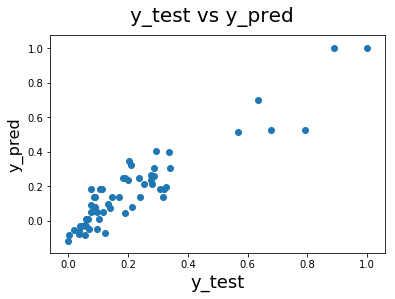

In [430]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.show()

Text(0,0.5,'Car_Price')

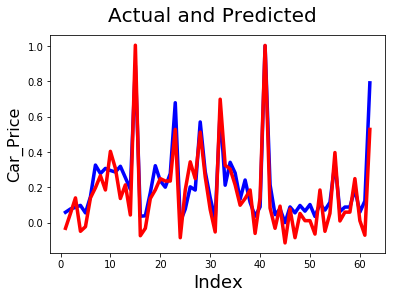

In [434]:
# Actual vs Predicted
c = [i for i in range(1,63,1)]
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=3.5, linestyle="-")     #Plotting Actual
plt.plot(c,y_pred, color="red",  linewidth=3.5, linestyle="-")  #Plotting predicted
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Car_Price', fontsize=16)

In [432]:
# R-squared score on the test set.

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7972303501044514

### RMSE

In [433]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, y_pred))

0.0942041181678094

# so, my final model is lm6 with R squared values of train dataset is 88% 
# R squared values of test dataset is ~80%.